In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [4]:
data=pd.read_csv("winequality-red.csv")
data.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().any() # to find null value
data = data.fillna(method='ffill') # to fill null value

In [7]:
x=data[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
        "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]].values
y=data["quality"].values

C:\Users\Bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

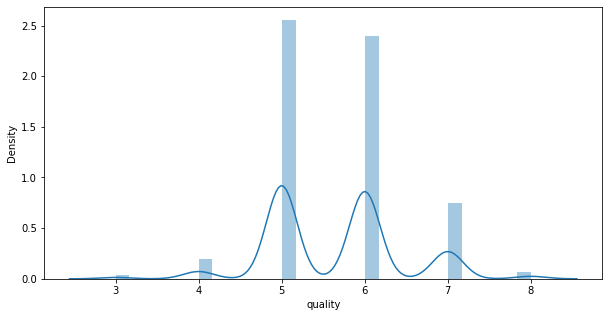

In [8]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(data['quality'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
model = LinearRegression().fit(X_train, y_train)

In [11]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination: r_sq=', r_sq)

coefficient of determination: r_sq= 0.36545196162068627


In [12]:
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[5.7829301  5.03619267 6.59698929 5.33912637 5.93952898 5.0072068
 5.39616171 6.05211188 4.86760343 4.95067572 5.28580441 5.41265269
 5.7057424  5.12921737 5.52885206 6.38052412 6.81012527 5.73803346
 5.97618825 5.08613415 6.34479863 5.16400983 5.64203971 6.1462903
 5.4817802  5.03391406 5.18721293 6.48783659 5.33301372 6.30458308
 6.03452293 5.82849303 5.58503524 5.28512701 5.75656128 6.15273792
 5.14134479 5.48228021 6.38983359 5.7901819  5.42936928 6.04810414
 6.70159678 6.60160183 5.97253803 4.78890763 5.49565005 6.01881894
 5.48895041 6.10824243 5.3126164  5.28492351 5.76043226 6.36081498
 5.7195388  5.26971928 5.08498332 5.31050693 6.50895816 5.44323413
 5.16377401 5.76427324 6.0703837  6.28933679 5.07315141 6.11874641
 5.35681067 6.01343647 6.12184268 5.98547673 5.35327968 5.4367731
 5.06017324 5.58939889 5.62593935 6.25651326 5.37875073 5.31024191
 5.72008022 6.30275434 5.71093253 5.27783285 5.89582077 6.0876033
 5.50616533 5.37465715 6.2437351  5.07332478 5

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(30)

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


In [14]:
df=df[1:20]
df

,Actual,Predicted
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676
10,5,5.285804


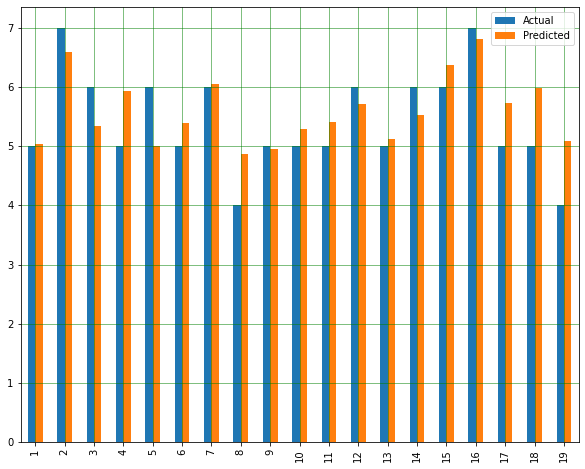

In [15]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [16]:
x_new=np.array([6.5, 0.510, 0.50, 4.5, 0.078, 16.5, 45.0, 0.99586, 4.38, 0.88, 13.0]).reshape((1, -1))
x_new

array([[ 6.5    ,  0.51   ,  0.5    ,  4.5    ,  0.078  , 16.5    ,
        45.     ,  0.99586,  4.38   ,  0.88   , 13.     ]])

In [17]:
y_new = model.predict(x_new)
print(y_new)

[6.28409899]
